In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1) Function for gradient descent

In [82]:
def gradient_descent(f, grad_f, x0, kmax, lr='Armijo', tolf = 10e-6, tolx = 10e-6):
    '''
    Inputs : 
       - f is a python function
       - grad_f is a python function
       - x0 is the starting guess
       - tolf and tolx are conditions
       - kmax is maximum number of iteration, to avoid infinite loops
       - lr is the value of alpha, if None the armijo rule is applied
    Returns :
       x --> stationary point
       f_val --> A vector containing the values of f during the iterations
       err_val --> A vector containing the values of || grad(f(Xk) || 
    '''
    k = 0

    fval = np.zeros((kmax + 1,))
    
    err_val = np.zeros((kmax +1,))

    grads = np.zeros((kmax + 1, x0.shape[0]))

    conditions = False  
    
    first_value = x0
    
    x_val = np.zeros((kmax + 1, x0.shape[0]))
    
    
   
    while not conditions:
        #update alpha
        if lr == 'Armijo':
            alpha = backtracking(f, grad_f, x0)
        else : 
            alpha = lr
        # update x 
        grad = grad_f(x0)
        x = x0 - grad* alpha
        x_val[k] = x.reshape(x.shape[0],)
        grads[k] = grad
        fval[k] = f(x)
        err_val[k] = np.linalg.norm(x - x0)

        # conditions to finish the loop update
        conditions = k >= kmax or np.linalg.norm(grad_f(x)) < tolf * np.linalg.norm(grad_f(first_value)) or err_val[k] < tolx * np.linalg.norm(x0)  
       
        x0 = x

        k += 1

    fval = fval[:k]
    err_val = err_val[:k]
    x_val = x_val[:k, :]
    grads = grads[:k, :]

    return x, fval, err_val, x_val, grads

def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * np.array(grad_f(x))) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

## 1.1) Testing with different functions

In [77]:
def f1(x, dom = False):
    if dom :
        return 2
    return (x[0] - 3)**2 + (x[1] -1)**2
def grad_f1(x):
    return 2 * (x[0] - 3), 2 * (x[1] - 1)

def f2(x, dom = False):
    if dom: 
        return 2
    return 10 * (x[0] - 1)**2 + (x[1] - 2)**2
def grad_f2(x):
    return 20 * (x[0] - 1), 2 * (x[1] - 2)

def set_paramf3(N, f3, grad_f3, mode):
    v = np.arange(0, 1, 1 / N)
    A = np.vander(v)
    b = A @ np.ones((A.shape[1], 1))
    def inner(x):
        if mode == 'func':
            return f3(x, v, A, b)
        elif mode == 'grad':
            return grad_f3(x, v, A, b)
    return inner
    
def f3(x, v, A, b):
    return np.linalg.norm(A @ x - b, 'fro')**2
def grad_f3(x, v, A, b):
    ''' 
    Returns a row vector with the gradient
    '''
    return (-2 * (b - A @ x).T @ A).reshape(x.shape[0], 1)


def set_paramf4(N, f4, lmbd, mode):
    v = np.arange(0, 1, 1 / N)
    A = np.vander(v)
    b = A @ np.ones((A.shape[1], 1))
    def inner(x):
        if mode == 'func':
           return f4(x, v, A, b, lmbd)
        elif mode == 'grad':
           return grad_f4(x, v, A, b, lmbd)
    return inner

def f4(x, v, A, b, lmbd):   
    return np.linalg.norm(A @ x - b, 'fro') + lmbd / 2 * np.linalg.norm(x)**2
def grad_f4(x, v, A, b, lmbd):
    return (-2 * (b - A @ x).T @ A + lmbd * x.T).reshape(x.shape[0], 1)

def f5(x):
    return x**4 + x**3 - 2 * x**2 - 2 * x
def grad_f5(x):
    return 4 * x**3 + 3 * x **2 - 4 * x - 2

In [71]:
def plot_all(func, grad, real_min, x0, lrates):
    if real_min != None:
        sub1, (ax1, ax2) = plt.subplots(1, 2)
    else :
        ax1 = plt.subplot()
    for lr in lrates:
        x , fval, err_val, x_val, grads = gradient_descent(func, grad, x0, kmax = 100 , lr=lr) 
        print(
            'Min obtained {}\n lr : {}\n Niter : {}'.format(x, lr, len(err_val))
        )
        if real_min != None:
            print('Real minimum: {}\nFinal error : {}\n '.format(real_min, x - real_min))
        print(grads.shape, grads[0].shape)
        print(x_val.shape)
        ax1.plot(range(len(err_val)), np.linalg.norm(grads, axis = 1))
        if real_min != None:
            plt.plot(range(x_val.shape[0]), np.linalg.norm(x_val - real_min, axis = 1))
    plt.legend(lrates)
    plt.show()

def loop(funcs, grads, x0s, lrates):
    for i in range(len(funcs)):
        plot_all(funcs[i], grads[i], None, x0s[i], lrates)


In [ ]:
# Choose the function and the parameter


x0 = np.zeros((6, 1))
func = set_paramf3(6, f3, grad_f3, mode = 'func')
grad = set_paramf3(6, f3, grad_f3, mode = 'grad')
real_min = None

lrates = [round(1 / n**5, 4) for n in range(2,5)]
lrates.insert(0, 'Armijo')


# Plot all will plot the gradient norm for different values of the lr
plot_all(func, grad, None, x0, lrates)

# Loop call plot all for a series of functions in the same domain
funcs = [set_paramf3(i, f3, grad_f3, mode='func') for i in range(5, 30, 5)]
grads = [set_paramf3(i, f3, grad_f3, mode='grad') for i in range(5, 30, 5)]
x0s = [np.zeros((i, 1)) for i in range(5, 30, 5)]
loop(funcs, grads, x0s, lrates)

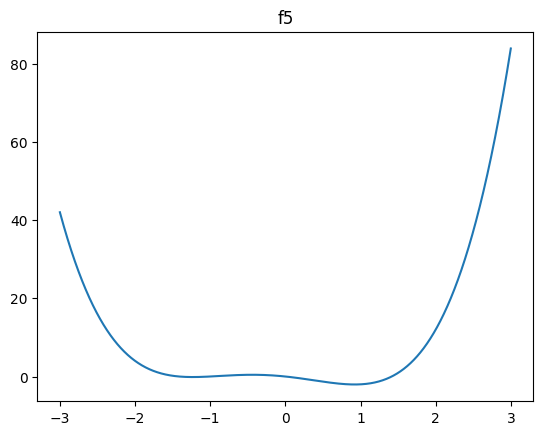

Descent with starting guess 0
Min obtained [0.92219092]
 lr : Armijo
 Niter : 48
(48, 1) (1,)
(48, 1)
Min obtained [0.92221039]
 lr : 0.0312
 Niter : 31
(31, 1) (1,)
(31, 1)
Min obtained [0.86855448]
 lr : 0.0041
 Niter : 101
(101, 1) (1,)
(101, 1)
Min obtained [0.2410564]
 lr : 0.001
 Niter : 101
(101, 1) (1,)
(101, 1)


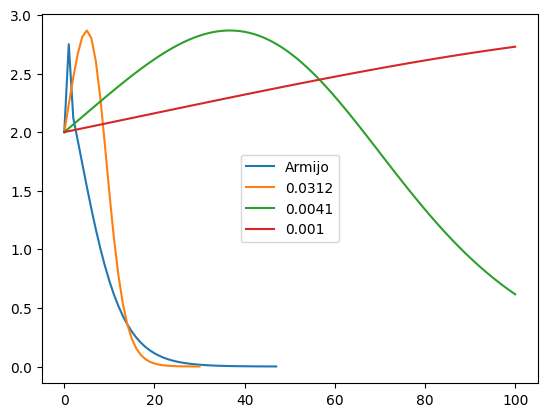

Descent with starting guess near to a local minimum
Min obtained [-1.23233765]
 lr : Armijo
 Niter : 80
(80, 1) (1,)
(80, 1)
Min obtained [-1.23215664]
 lr : 0.0312
 Niter : 43
(43, 1) (1,)
(43, 1)
Min obtained [-1.25428095]
 lr : 0.0041
 Niter : 101
(101, 1) (1,)
(101, 1)
Min obtained [-1.53171725]
 lr : 0.001
 Niter : 101
(101, 1) (1,)
(101, 1)


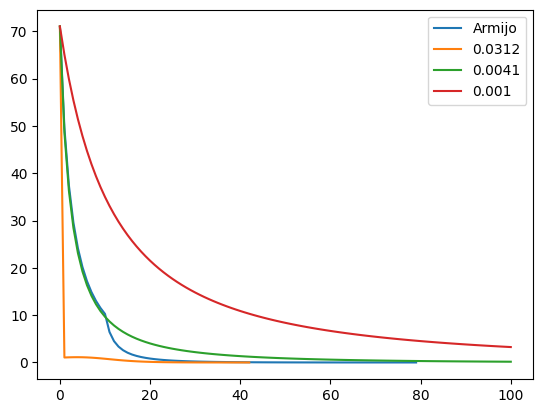

In [84]:
# f5 plotting
x = np.array(np.arange(-3, 3, 0.001))
y = [f5(i) for i in x]

plt.plot(x, y)
plt.title('f5')
plt.show()

# gradient descent from x0 = 0
print('Descent with starting guess 0')
plot_all(f5, grad_f5, None, np.array((0,)), lrates)

print('Descent with starting guess near to a local minimum')
plot_all(f5, grad_f5, None, np.array((-3,)), lrates)

In [19]:
def SGD(loss, grad_l, w0, data, batch_size, n_epochs):
    ''' 
    Input:
        l: the function l(w; D) we want to optimize.
        It is supposed to be a Python function, not an array.
        grad_l: the gradient of l(w; D). It is supposed to be a Python function, not an array.
        w0: an n-dimensional array which represents the initial iterate. By default, it
        should be randomly sampled.
        data: a tuple (x, y) that contains the two arrays x and y, where x is the input data,
        y is the output data.
        batch_size: an integer. The dimension of each batch. Should be a divisor of the number of data.
        n_epochs: an integer. The number of epochs you want to reapeat the iterations.
    Output:
        w: an array that contains the value of w_k FOR EACH iterate w_k (not only the latter).
        f_val: an array that contains the value of l(w_k; D)
        FOR EACH iterate w_k ONLY after each epoch.
        grads: an array that contains the value of grad_l(w_k; D)
        FOR EACH iterate w_k ONLY after each epoch.
        err: an array the contains the value of ||grad_l(w_k; D)||_2
        FOR EACH iterate w_k ONLY after each epoch.
    '''
    curr_epoch = 1
    n_iter = 0
    X , y = data
    l, N = X.shape # Data on columns

    alpha = 0.0001

    # Descent array definition
    weight_values = np.zeros((n_epochs * (N // batch_size) , l))
    

    loss_values = np.zeros(n_epochs)
    grad_values = np.zeros((n_epochs, l))
    
    err_values = np.zeros(n_epochs)
    
    
    while curr_epoch <= n_epochs:

        for iter in range(N // batch_size):
            
            weight_values[n_iter, :] = np.reshape(w0, (l,))
            
            # I take a random batch from the my dataset
            
            idxs, X_sample, y_sample = random_sample(X, y, batch_size) 
            
            # I delete the elements of the batch from the dataset, to avoid repetition
            X, y = clear(idxs, X , y)
            
            # Then i need to compute the value of the gradient for every element of the batch
            grad_arr = np.zeros((l, 1))
            for i in range(batch_size):
                
                data_input = np.reshape(X_sample[:, i], (l, 1))
                
                # Is a numpy multi dimesional array
                grad_arr += grad_l(data_input, w0, y_sample[i])
            grad_arr = grad_arr / batch_size
            w = w0 - alpha * grad_arr
            w0 = w

            n_iter += 1
        
        # I compute the value of the loss at the end of every epoch
        l_val = 0
        for i in range(batch_size):
            data_input = np.reshape(X_sample[:, i], (l, 1))
            l_val += float(loss(data_input, w0, y_sample[i]))
        l_val /= batch_size
        
        loss_values[curr_epoch - 1] = l_val
        grad_values[curr_epoch - 1, :] = np.reshape(grad_arr, (l,))
        err = np.linalg.norm(grad_arr)
        err_values[curr_epoch - 1] = err

        print('iter : {} loss_value : {} grad_norm {}'.format(n_iter, l_val, err))

        # Start a new epoch
        curr_epoch += 1

        # Restore the dataset to its original value
        X, y = data 
    return weight_values, loss_values, grad_values, err_values
    
def random_sample(X, y, batch_size):
    '''
    Input : X is the dataset
            y is the labels array
            batch_size is the lenght of the subset
    Return : Samples
            Indexes of the elements of X and y which aren't in the batch (to clean it)
    '''
    idxs = np.arange(X.shape[1])
    np.random.shuffle(idxs)

    batch_idxs = idxs[:batch_size]
    keep_idxs = idxs[batch_size:]
    
    X_sample = X[:, batch_idxs]
    y_sample = y[batch_idxs]
    

    return keep_idxs, X_sample, y_sample

def clear(keep_idxs, X, y):
    '''
    Input : dataset and labels
    Return : dataset and labels wiew without the sample elements
    '''
    return X[:, keep_idxs], y[keep_idxs] 
    
# Function section
def sigmoid(z):
    '''         
    Input : float value
    Returns : sigmoid of z
    '''
    return 1 / ( 1 + np.exp(-z))

def loss_func(w0, x_hat, y):
    '''     
    Input : w0 is a column vector of weights
            x_hat is a column vector with a data-point
            y is the label
    Returns : the MSE of the prodiction xhat @ wo 
    '''
    z = x_hat.T @ w0
    fw = sigmoid(z)
    return (fw - y)**2

def grad_loss(w0, x_hat, y):
    '''      
    Input : w0 is a column vector of weights
            x_hat is a column vector with a data-point
            y is the label
    Returns : the gradient of the loss function computed over w0
    '''
    fw = sigmoid(x_hat.T @ w0)
    return fw * (1 - fw) * x_hat * (fw - y)

def divide_dataset(X, Y, N_train):
    '''
    Input: X, y dataset and labels
           N_train is the number of element of the train set
    Returns: The dasatet randomly divided into train and test
             according to N_train in the form :
             (Xtrain, Ytrain), (Xtest, Ytest) 
    '''
    
    idxs = np.arange(0, len(X[0])-1, 1)
    np.random.shuffle(idxs)

    trian_idxs = idxs[:N_train]
    test_idxs = idxs[N_train:]


    XTrain = X[:,trian_idxs]
    YTrain = Y[trian_idxs]

    XTest = X[:,test_idxs]
    YTest = Y[test_idxs]

    return (XTrain, YTrain), (XTest, YTest)


# Forward step implementation
def predictor(x_hat, w, treshold):
    fw = sigmoid(x_hat.T @ w)
    if fw > treshold:
        return 1
    else : 
        return 0
def accuracy(preds, labels):
    sum = 0 
    for i in range (len(preds)):
        if preds[i] == labels[i]:
            sum += 1
    return sum / len(preds)

# MNIST dataset 
Opening + splitting + digit selection

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data_arr = np.array(data)
#print(data.head)
print(data_arr.shape)

(42000, 785)


In [4]:
X = data_arr[:, :-1].T
y = data_arr[:, 0]
print(y.shape)

l, N = X.shape
print('Number of observation : {} lenght of a data point : {}'.format(N, l))

(42000,)
Number of observation : 42000 lenght of a data point : 784


In [5]:
classes = (0, 1)

# I apply my mask to the two arrays
masks = [y == i for i in classes]

# List of dataset with a unique digit taken from mask
Xlist = [X[:, mask] for mask in masks]
Ylist = [y[mask] for mask in masks]

print('Single class datasets shape')
print([X.shape for X in Xlist])

# Lest put them into a single nunpy array
X = np.concatenate(Xlist, axis=1) 
y = np.concatenate(Ylist)

l, N = X.shape

print('Dataset with only selected digits')
print('X shape : {}\nY shape : {} '.format(X.shape, y.shape))

print("Splitting into train and test")
(Xtrain, Ytrain), (Xtest, Ytest) = divide_dataset(X, y, int(0.8 * N))

print('Train set shape : {}'.format(Xtrain.shape))
print('Test set shape : {}'.format(Xtest.shape))

Single class datasets shape
[(784, 4132), (784, 4684)]
Dataset with only selected digits
X shape : (784, 8816)
Y shape : (8816,) 
Splitting into train and test
Train set shape : (784, 7052)
Test set shape : (784, 1763)


In [17]:
# Train shape
l, N = Xtrain[:, [0, 1]].shape

X_hat = np.concatenate((np.ones((1, N)), Xtrain[:, [0, 1]]), axis = 0)
w0 = np.random.normal(0, 0.0004, l+1)
w0 = np.reshape(w0, (l + 1, 1))
w0 = np.ones((l + 1, 1))


print('Train set shape : {}'.format(X_hat.shape))
print('Weight vector shape : {}'.format(w0.shape))


w, loss, grad, err = SGD(loss_func, grad_loss, w0, (X_hat, Ytrain[[0, 1]]), 2, 20)

Train set shape : (785, 2)
Weight vector shape : (785, 1)
iter : 2 loss_value : 1.0 grad_norm 0.0
iter : 4 loss_value : 1.0 grad_norm 0.0
iter : 6 loss_value : 1.0 grad_norm 0.0
iter : 8 loss_value : 1.0 grad_norm 0.0
iter : 10 loss_value : 1.0 grad_norm 0.0
iter : 12 loss_value : 1.0 grad_norm 0.0
iter : 14 loss_value : 1.0 grad_norm 0.0
iter : 16 loss_value : 1.0 grad_norm 0.0
iter : 18 loss_value : 1.0 grad_norm 0.0
iter : 20 loss_value : 1.0 grad_norm 0.0


IndexError: index 20 is out of bounds for axis 0 with size 20

In [87]:
final_weights = np.reshape(w[-1, :], (l + 1, 1))
Xtest = np.concatenate((np.ones((1, Xtest.shape[1])), Xtest), axis = 0)
preds = []
for i in range(Xtest.shape[1]):
    data_point = np.reshape(Xtest[:, i], (l + 1, 1))
    preds.append(predictor(data_point, final_weights, 0.5))



C:\Users\Kilian\AppData\Local\Temp\ipykernel_2256\1846188748.py:120: RuntimeWarning: overflow encountered in exp
  return 1 / ( 1 + np.exp(-z))
